AULA 01 - COLAB COM PYTHON E PANDAS

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [3]:
url = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'
dados = pd.read_csv(url)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [4]:
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
1144,NaN,Cidade Jardim,São Paulo,500,4,2,5,R$ 3.500.000
2323,"Rua Pirapó, 222",Jardim Guedala,São Paulo,650,3,3,3,R$ 5.500.000
590,"Rua Sócrates Abrahão, 16",Parque Munhoz,São Paulo,145,3,3,2,R$ 768.000
4453,NaN,Vila Sílvia,São Paulo,125,2,3,2,R$ 300.000
3158,Rua Conde D'Eu,Santo Amaro,São Paulo,756,5,6,5,R$ 3.800.000
6713,Rua Manuel Navarro,Jardim Guedala,São Paulo,470,4,8,4,R$ 3.300.000
1983,Rua Doutor David Campista,Jardim Paulista,São Paulo,386,3,5,3,R$ 3.890.000
6248,NaN,Alto de Pinheiros,São Paulo,492,3,5,6,R$ 4.200.000
2886,NaN,Alto de Pinheiros,São Paulo,400,3,4,3,R$ 3.450.000
3095,NaN,Vila Oratório,São Paulo,93,3,1,1,R$ 531.000


In [5]:
dados['Bairro'][6522]

'Vila Paulo Silas'

In [6]:
dados.Metragem.mean()

442.30065947242207

In [7]:
dados['Metragem'].mean()

442.30065947242207

In [8]:
vila_mariana = (dados['Bairro'] == 'Vila Mariana')

In [9]:
vila_mariana

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

In [10]:
dados['Bairro'].value_counts()

Bairro
Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: count, Length: 701, dtype: int64

<Axes: xlabel='Bairro'>

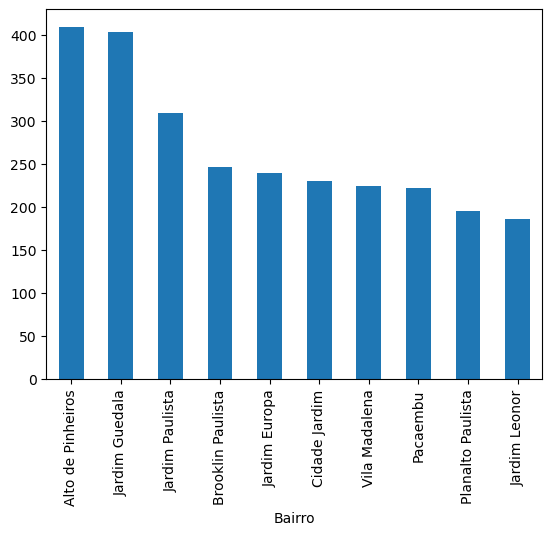

In [11]:
n_imoveis_bairro = dados['Bairro'].value_counts()
n_imoveis_bairro.head(10).plot.bar()

In [12]:
media_bairro = dados.groupby('Bairro')['Metragem'].mean().reset_index()
media_bairro

,Bairro,Metragem
0,Aclimação,253.056818
1,Alto da Boa Vista,418.875000
2,Alto da Lapa,294.337209
3,Alto da Mooca,270.050000
4,Alto de Pinheiros,433.444988
...,...,...
696,Vila Água Funda,152.200000
697,Água Branca,191.000000
698,Água Fria,165.416667
699,Água Funda,139.000000


AULA 02 - TRATAMENTO DE DADOS E PRIMEIROS GRÁFICOS

In [13]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [14]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [15]:
dados['Valor'][0]

'R$ 7.000.000'

In [16]:
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
7916,Rua Manuel Rodrigues da Costa,Vila Guedes,São Paulo,145,3,2,3,R$ 619.000
6804,NaN,Vila Campo Grande,São Paulo,100,3,1,2,R$ 530.000
3089,NaN,Jardim Miriam,São Paulo,400,5,5,4,R$ 1.950.000
3373,NaN,Jardim Paulistano,São Paulo,635,4,9,7,R$ 14.000.000
6325,Rua Iguatemi,Itaim Bibi,São Paulo,125,3,2,1,R$ 2.500.000
4716,NaN,Jardim Guedala,São Paulo,580,4,1,4,R$ 3.500.000
9976,Rua Eliane Araújo Neves,Jardim Catanduva,São Paulo,94,2,2,2,R$ 470.000
4749,NaN,Super Quadra Morumbi,São Paulo,255,4,3,3,R$ 989.000
5295,Rua Domingos Lopes,Campo Belo,São Paulo,180,3,4,2,R$ 1.050.000
5567,Rua França Júnior,Jardim da Saúde,São Paulo,481,3,3,2,R$ 1.500.000


In [17]:
dados['Valor'].str.split(expand=True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [18]:
dados['Valor'].str.split(expand=True)[0].unique()

array(['R$'], dtype=object)

In [19]:
len(dados['Valor'].str.split(expand=True)[1].unique())

1038

In [20]:
dados['Valor'].str.split(expand=True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [21]:
dados[['Moeda', 'Valor_Anuncio', 'Tipo_anuncio']] = dados['Valor'].str.split(expand=True)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [22]:
dados_vendas = dados[dados['Tipo_anuncio'].isnull()]

In [23]:
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [24]:
dados_vendas['Valor_Anuncio'].str.replace('.', '').astype(float)

0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10002    1500000.0
10003     665000.0
10004    2300000.0
10005    1050000.0
10007     270000.0
Name: Valor_Anuncio, Length: 9156, dtype: float64

In [25]:
dados_vendas['Valor_Anuncio_Float'] = dados_vendas['Valor_Anuncio'].str.replace('.', '').astype(float)
dados_vendas

C:\Users\Matheus\AppData\Local\Temp\ipykernel_8732\3052706691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas['Valor_Anuncio_Float'] = dados_vendas['Valor_Anuncio'].str.replace('.', '').astype(float)


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo_anuncio,Valor_Anuncio_Float
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.0
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.0
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.0
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.0
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.0
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.0
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.0
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.0


In [26]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9156 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  6107 non-null   object 
 1   Bairro               9146 non-null   object 
 2   Cidade               9156 non-null   object 
 3   Metragem             9156 non-null   int64  
 4   Quartos              9156 non-null   int64  
 5   Banheiros            9156 non-null   int64  
 6   Vagas                9156 non-null   int64  
 7   Valor                9156 non-null   object 
 8   Moeda                9156 non-null   object 
 9   Valor_Anuncio        9156 non-null   object 
 10  Tipo_anuncio         0 non-null      object 
 11  Valor_Anuncio_Float  9156 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 929.9+ KB


In [27]:
dados_vendas['Valor_Anuncio_Float'].mean()

3052202.9554390563

<Axes: ylabel='Frequency'>

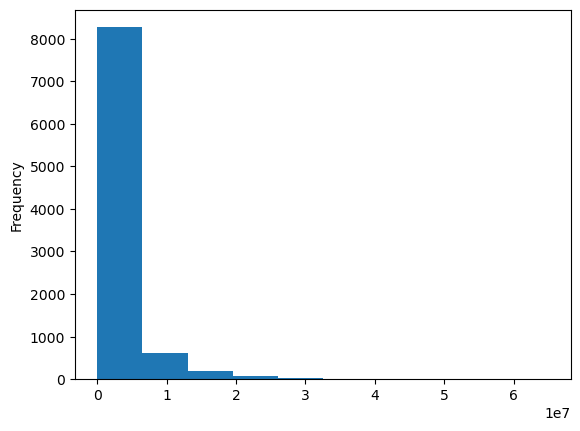

In [28]:
dados_vendas['Valor_Anuncio_Float'].plot.hist()

In [29]:
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio_Float
count,9156.000000,9156.000000,9156.000000,9156.000000,9.156000e+03
mean,434.416230,3.446811,3.797073,3.960135,3.052203e+06
std,7856.422978,1.048944,1.967873,2.601022,3.944208e+06
min,10.000000,1.000000,1.000000,1.000000,1.300000e+04
25%,168.000000,3.000000,2.000000,2.000000,8.900000e+05
50%,276.000000,3.000000,4.000000,4.000000,1.800000e+06
75%,450.000000,4.000000,5.000000,5.000000,3.500000e+06
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07


c:\Users\Matheus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


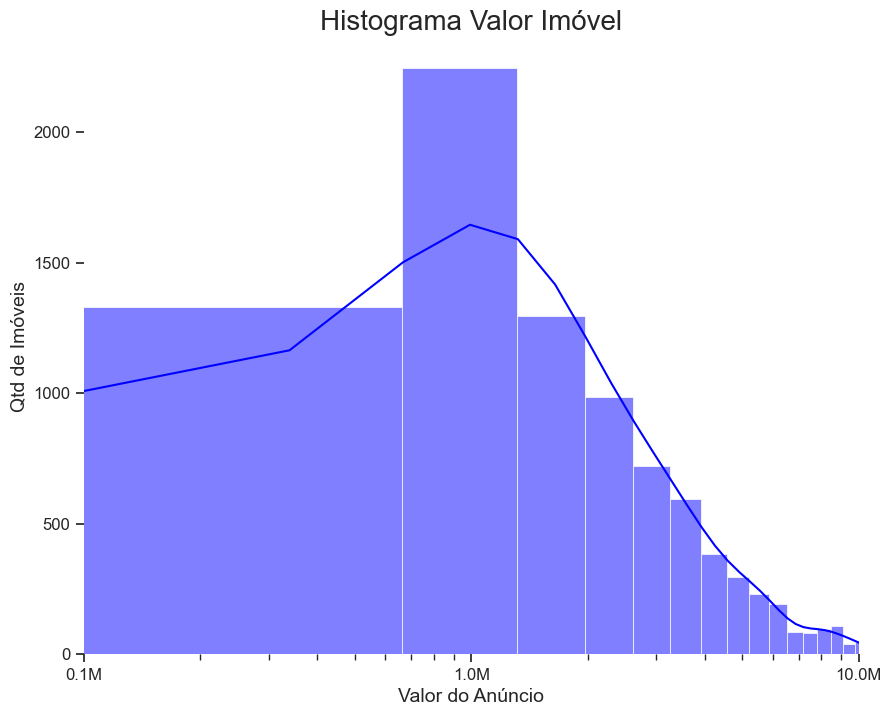

In [104]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,8))
ax = sns.histplot(data = dados_vendas, x='Valor_Anuncio_Float', kde=True, color='Blue', bins=100)
ax.set_title('Histograma Valor Imóvel', fontsize=20)
plt.xlim((100000, 10000000))
ax.set_xlabel('Valor do Anúncio', fontsize=14)
ax.set_ylabel('Qtd de Imóveis', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid(False)
ax.set_frame_on(False)
plt.xscale('log')

def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

In [100]:
dados_vendas['Preco_m2'] = dados_vendas['Valor_Anuncio_Float'] / dados_vendas['Metragem']

C:\Users\Matheus\AppData\Local\Temp\ipykernel_8732\2566136589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas['Preco_m2'] = dados_vendas['Valor_Anuncio_Float'] / dados_vendas['Metragem']


In [102]:
media_preco_m2_bairro = dados_vendas.groupby('Bairro')['Preco_m2'].mean().reset_index()
print(media_preco_m2_bairro)

                Bairro      Preco_m2
0            Aclimação   7656.169465
1    Alto da Boa Vista   5849.569011
2         Alto da Lapa   7606.728080
3        Alto da Mooca   5691.740133
4    Alto de Pinheiros  11269.979971
..                 ...           ...
692    Vila Água Funda   4467.127995
693        Água Branca   7269.113912
694          Água Fria   5841.104428
695         Água Funda   3876.862745
696          Água Rasa   4509.608463

[697 rows x 2 columns]


In [105]:
media_preco_m2_bairro

,Bairro,Preco_m2
0,Aclimação,7656.169465
1,Alto da Boa Vista,5849.569011
2,Alto da Lapa,7606.728080
3,Alto da Mooca,5691.740133
4,Alto de Pinheiros,11269.979971
...,...,...
692,Vila Água Funda,4467.127995
693,Água Branca,7269.113912
694,Água Fria,5841.104428
695,Água Funda,3876.862745


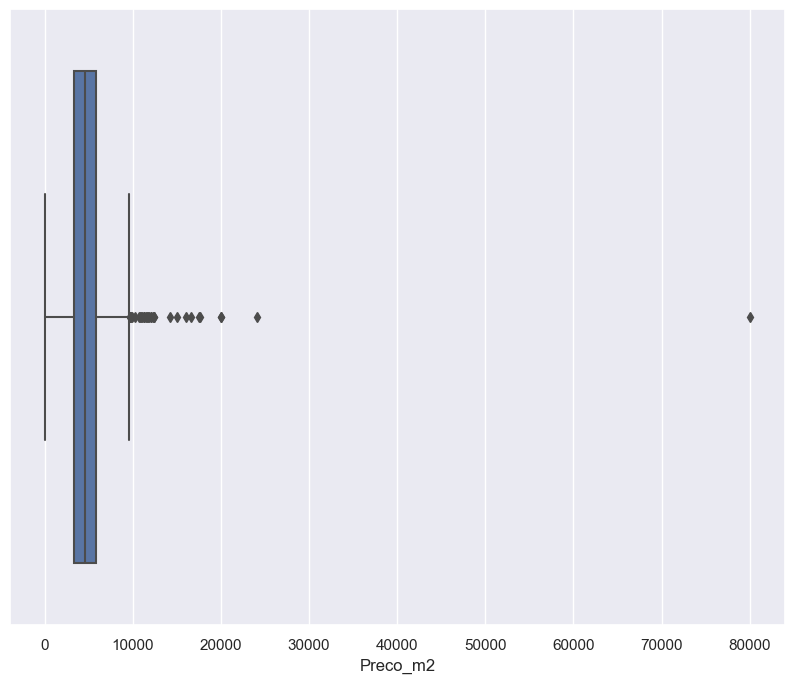

In [117]:
sns.set_theme()
plt.figure(figsize=(10,8))
ax = sns.boxplot(data = media_preco_m2_bairro, x='Preco_m2')